# Intern : Pradnya Santosh Salve

# Task 2 : Prediction Using Unsupervised Machine Learning

**Importing all required liabraries**

In [75]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

**Loading the data**

In [76]:
iris=pd.read_csv("C:\\Users\\icon\\Desktop\\ML_TE\\Iris.csv")
print("Data imported successfully")

Data imported successfully


In [77]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Printing first five rows**

In [78]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Printing last five rows**

In [79]:
iris.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


**Printing no of rows and columns in dataset**

In [80]:
iris.shape

(150, 5)

**Checking for null values**

In [81]:
iris.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

**Checking statistical description**

In [82]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Checking for no of samples in one species**

In [83]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**Finding correlation between features**

In [84]:
iris.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


**Data Visualization**

Stripplot

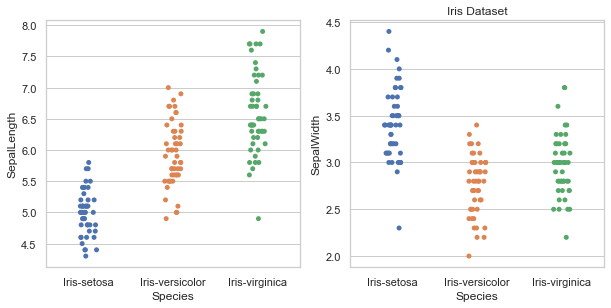

In [85]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
ax = sns.stripplot(x= 'Species',y = 'SepalLength',data = iris)
plt.subplot(2,2,2)
ax = sns.stripplot(x= 'Species',y = 'SepalWidth',data = iris)
plt.title('Iris Dataset')
plt.show()

Boxplot

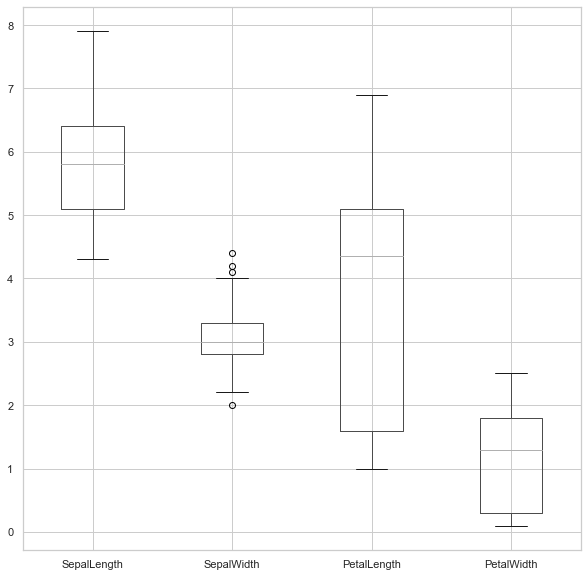

In [86]:
iris.boxplot(figsize=(10,10))
plt.show()

Countplot

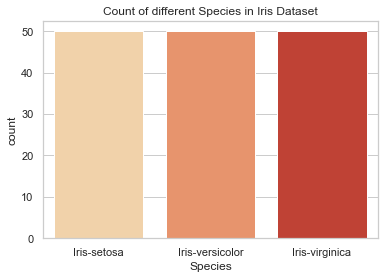

In [48]:
sns.countplot(x= 'Species',data = iris,palette = 'OrRd')
plt.title('Count of different Species in Iris Dataset')
plt.show()

Heatmap

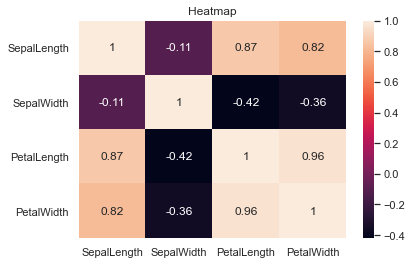

In [68]:
sns.heatmap(iris.corr(), annot = True)
plt.title('Heatmap')
plt.show()

**Finding the optimum number of clusters using k-means clustering**

In [64]:
x = iris.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print('k:',i ,"wcss:",kmeans.inertia_)

C:\Users\icon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 1 wcss: 680.8243999999996
k: 2 wcss: 152.36870647733915
k: 3 wcss: 78.94084142614601
k: 4 wcss: 57.317873214285726
k: 5 wcss: 46.56163015873017
k: 6 wcss: 38.930963049671746
k: 7 wcss: 34.190687924796634
k: 8 wcss: 30.063874432733137
k: 9 wcss: 27.84235606060608
k: 10 wcss: 26.04820224804435


**Plotting the results using Elbow method**

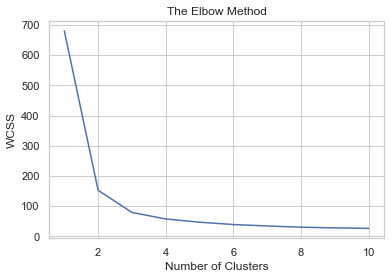

In [54]:
plt.plot(range(1,11),wcss)  
plt.title('The Elbow Method')  
plt.xlabel('Number of Clusters')  
plt.ylabel('WCSS')  
plt.show()

**Initializing K-Means with optimum number of clusters**

In [57]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++',max_iter = 300,n_init = 10,random_state = 0)
y_kmeans = kmeans.fit_predict(x)  #fiting K-Means to the dataset

**Predicting values**

In [58]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

**Visualizing the clusters**

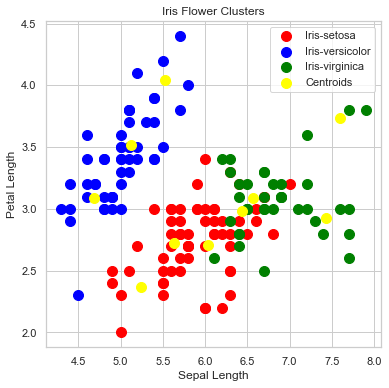

In [71]:
plt.figure(figsize=(6,6))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolor')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow', label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

# Thank You !!!